In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = r'/Users/matthewabrams/Desktop/Stocks Data/'
stocks = pd.read_csv(os.path.join(path, 'Stock Datasets/New Files/6_Stocks_Transformed.csv'), index_col = False)
stocks.drop(columns =['Unnamed: 0', 'MA_Six_Months', 'MA_One_Year'], inplace = True)
stocks

,Date,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $
0,2014-09-22,Amazon,62189780,16.2250,16.4245,16.4745,16.4745
1,2014-09-23,Amazon,46972460,16.1815,16.1230,16.3800,16.3800
2,2014-09-24,Amazon,52802720,16.4105,16.2085,16.4720,16.4720
3,2014-09-25,Amazon,58573060,16.0965,16.3995,16.4270,16.4270
4,2014-09-26,Amazon,72707740,16.1605,16.0300,16.1750,16.1750
...,...,...,...,...,...,...,...
15097,2024-09-16,Tesla,54323000,226.7800,229.3000,229.9600,223.5300
15098,2024-09-17,Tesla,66761640,227.8700,229.4500,234.5700,226.5533
15099,2024-09-18,Tesla,78010200,227.2000,230.0900,235.6800,226.8800
15100,2024-09-19,Tesla,102694600,243.9200,234.0000,244.2400,232.1300


In [3]:
# Choosing a stock for linear regression

apple_stock = stocks[stocks['Stock_Name']=='Apple']
apple_stock

,Date,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $
2517,2014-09-22,Apple,209686640,25.2650,25.4500,25.5350,25.5350
2518,2014-09-23,Apple,253023440,25.6600,25.1500,25.7350,25.7350
2519,2014-09-24,Apple,239897040,25.4375,25.5400,25.7125,25.7125
2520,2014-09-25,Apple,398757200,24.4675,25.1275,25.1775,25.1775
2521,2014-09-26,Apple,249107080,25.1875,24.6325,25.1875,25.1875
...,...,...,...,...,...,...,...
5029,2024-09-16,Apple,59357430,216.3200,216.5400,217.2200,217.2200
5030,2024-09-17,Apple,45519340,216.7900,215.7500,216.9000,216.9000
5031,2024-09-18,Apple,59894930,220.6900,217.5500,222.7100,222.7100
5032,2024-09-19,Apple,66781320,228.8700,224.9900,229.8200,229.8200


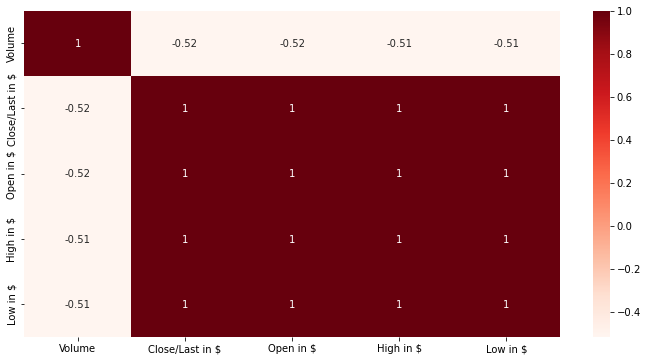

In [4]:
# Heat Map for Visualization Correlations

plt.figure(figsize=(12,6))
sns.heatmap(apple_stock.corr(),cmap = 'Reds', annot = True)
plt.show()

In [5]:
# Splitting the dataset 80% training and 20% testing
X = apple_stock[['Volume', 'Open in $', 'High in $', 'Low in $']].values
y = apple_stock['Close/Last in $'].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
# Creating regression model
regressor = LinearRegression()

# Fit linear regression model
model = regressor.fit(X_train, y_train)

# Use model to make prediction
y_pred = regressor.predict(X_test)

In [8]:
# With the test predictions complete, next step is to compare them (table of Actual Prices vs Predicted Prices)
# With the actual output values for X_test by organizing them in a dataframeformat

predicted = regressor.predict(X_test)
dframe = pd.DataFrame(y_test,predicted)
dfr = pd.DataFrame({'Actual_Price':y_test,'Predicted_Price':predicted})
print(dfr)

     Actual_Price  Predicted_Price
0         44.2600        44.540189
1         55.9925        55.868821
2         29.0375        29.000597
3         46.3650        46.826819
4        174.9100       173.800742
..            ...              ...
499      145.8500       145.144845
500       31.3562        31.065429
501       31.7575        31.723602
502      182.3100       182.998445
503       40.2375        40.394689

[504 rows x 2 columns]


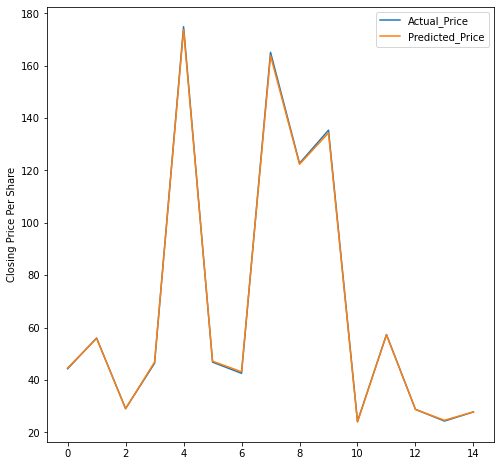

In [9]:
plt.figure(figsize = (8,8))
plt.ylabel('Closing Price Per Share')
plt.plot(dfr.head(15))
plt.legend(['Actual_Price', 'Predicted_Price'])

<AxesSubplot:>

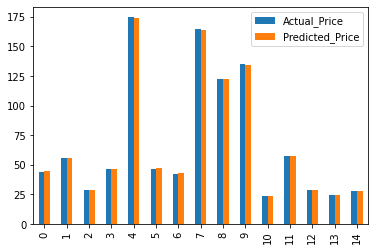

In [10]:
# Graph first 15 values

graph = dfr.head(15)
graph.plot(kind = 'bar')

In [11]:
# The predicted prices are extremely close to the actual prices

In [12]:
# Extreme Value Checks

In [13]:
apple_stock['Close/Last in $'].mean()

90.5511352800953

In [14]:
apple_stock['Close/Last in $'].std()

61.81149876821072

In [15]:
# Determining upper limit for outliers that are 2 standard deviations of the mean

upper_limit_1 = apple_stock['Close/Last in $'].mean() + 2*(apple_stock['Close/Last in $'].std())
upper_limit_1

214.17413281651673

In [16]:
# Determining lower limit for outliers that are 2 standard deviations of the mean

lower_limit_1 = apple_stock['Close/Last in $'].mean() - 2*(apple_stock['Close/Last in $'].std())
lower_limit_1

-33.07186225632614

In [17]:
apple_stock['Close/Last in $'].max()

234.82

In [18]:
# Determing the percentage of values under 'Close/Last in $' column that are not outliers
# Dividing the number of values between 0 and upper limit and the total number of observations

len(apple_stock[apple_stock['Close/Last in $']<upper_limit_1])/len(apple_stock)

0.9773539928486293

In [19]:
# About 2% of values under Close/Last in $ column are outliers

In [20]:
apple_stock['Volume'].mean()

121400335.7091776

In [21]:
apple_stock['Volume'].std()

69463670.86340798

In [22]:
# Determining upper limit for outliers that are 2 standard deviations of the mean

upper_limit_2 = apple_stock['Volume'].mean() + 2*(apple_stock['Volume'].std())
upper_limit_2

260327677.43599355

In [23]:
# Determining upper limit for outliers that are 2 standard deviations of the mean

lower_limit_2 = apple_stock['Volume'].mean() - 2*(apple_stock['Volume'].std())
lower_limit_2

-17527006.01763837

In [24]:
apple_stock['Volume'].max()

647530000

In [25]:
# Determing the percentage of values under Volume column that are not outliers
# Dividing the number of values between 0 and upper limit and the total number of observations

len(apple_stock[apple_stock['Volume']<upper_limit_2])/len(apple_stock)

0.9503377036154151

In [26]:
# About 5% of values under Volume in $ column are outliers

In [27]:
# Original Hypothesis: If number of shares traded increases, the closing price decreases.

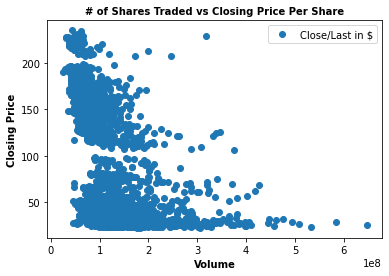

In [28]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

apple_stock.plot(x = 'Volume' , y ='Close/Last in $', style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('# of Shares Traded vs Closing Price Per Share', fontsize = 10, fontweight = 'bold')  
plt.xlabel('Volume', fontsize = 10, fontweight = 'bold')  
plt.ylabel('Closing Price', fontsize = 10, fontweight = 'bold')  
plt.show()

In [29]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X1 = apple_stock['Volume'].values.reshape(-1,1)
y1 = apple_stock['Close/Last in $'].values.reshape(-1,1)

In [30]:
# Split data into a training set and a test set.

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [31]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

# Fit the regression object onto the training set.

regression.fit(X1_train, y1_train)

LinearRegression()

In [32]:
# Predict the values of y using X.

y1_predicted = regression.predict(X1_test)

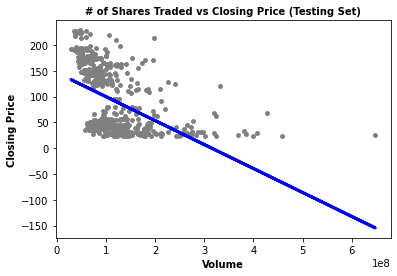

In [33]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X1_test, y1_test, color= 'gray', s = 15)
plot_test.plot(X1_test, y1_predicted, color= 'blue', linewidth = 3)
plot_test.title('# of Shares Traded vs Closing Price (Testing Set)', fontsize = 10, fontweight = 'bold')
plot_test.xlabel('Volume', fontsize = 10, fontweight = 'bold')
x_ticks = np.arange(0, 300, 50)
plot_test.ylabel('Closing Price', fontsize = 10, fontweight = 'bold')
plot_test.show()

In [34]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y1_test, y1_predicted).round() # This is the mean squared error
r2 = r2_score(y1_test, y1_predicted).round(2) # This is the R2 score. 

In [35]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_.round(1))
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.]]
Mean squared error:  3046.0
R2 score:  0.24


In [36]:
# Since this linear regression model is about 24% effective for my testing set, it's not the best fit for my data. 
# This could be due to data bias or not enough data points to produce significant results. 
# I'll need a model with more dimensionality to be able to predict what would effect the closing price of a stock

In [37]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,44.2600,86.183106
1,55.9925,97.486223
2,29.0375,92.928292
3,46.3650,98.731125
4,174.9100,123.871799
5,46.7900,118.113027
6,42.5125,92.543331
7,165.1200,102.237179
8,122.7200,86.841825
9,135.3700,118.470104


In [38]:
# The predicted values are extremely far from the actual values

In [39]:
# Compare how the regression fits the training set
y1_predicted_train = regression.predict(X1_train) # This is predicting X_train!

In [40]:
rmse = mean_squared_error(y1_train, y1_predicted_train).round()
r2 = r2_score(y1_train, y1_predicted_train).round(2)

In [41]:
print('Slope:' ,regression.coef_.round(1))
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.]]
Mean squared error:  2733.0
R2 score:  0.27


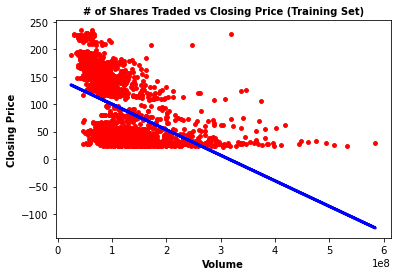

In [42]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X1_train, y1_train, color='red', s = 15)
plot_test.plot(X1_train, y1_predicted_train, color='blue', linewidth =3)
plot_test.title('# of Shares Traded vs Closing Price (Training Set)', fontsize = 10, fontweight = 'bold')
plot_test.xlabel('Volume', fontsize = 10, fontweight = 'bold')
x_ticks = np.arange(0, 300, 50)
plot_test.ylabel('Closing Price', fontsize = 10, fontweight = 'bold')
plot_test.show()

In [43]:
# This linear regression model is about 27% effective for my training set, not too much a difference from my testing set